In [2]:

# What version of Python do you have?
import sys, os

import keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print "Tensor Flow Version: %s" % tf.__version__
print "Keras Version: %s" % keras.__version__
print "Python %s " % sys.version
print "Pandas %s " % pd.__version__
print "Scikit-Learn %s " % sk.__version__


Tensor Flow Version: 1.8.0
Keras Version: 2.2.0
Python 2.7.15 (default, Sep 18 2018, 20:16:18) 
[GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)] 
Pandas 0.23.4 
Scikit-Learn 0.20.0 


In [3]:
train_directory = os.getcwd() + '/all/train'
test_directory = os.getcwd() + '/all/test'

print train_directory
print test_directory

/Users/wajih_siddiqui/DeepLearning/all/train
/Users/wajih_siddiqui/DeepLearning/all/test


# Loading Images

In [4]:
cameras = os.listdir(train_directory)

train_images = []
for camera in cameras:
    for fname in sorted(os.listdir(train_directory + '/' + camera)):
        train_images.append((camera, fname))

train = pd.DataFrame(train_images, columns=['camera', 'fname'])

test_images = os.listdir(test_directory)

all_classes = train['camera'].unique()

# Splitting Traning And Testing Data

In [5]:
%%time
from skimage import io
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

def get_image_path(camera, i):
    return io.imread('{}/{}/{}'.format(train_directory, camera, i))

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


images = train.sample(50)

images["image_data"] = [get_image_path(x[0], x[1]) for x in images.values]

train = images

(x_train, x_test, y_train, y_test) = train_test_split(train.image_data, train.camera, test_size=0.2)


for x in x_train:
    if len(x.shape) == 1:  
        plt.imshow(x[0], interpolation='nearest')
        plt

CPU times: user 19.7 s, sys: 1.08 s, total: 20.8 s
Wall time: 21.1 s


# Defining Digits

In [16]:
from IPython.display import display
import pandas as pd
import sys

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))


foo_x_train = []

foo_y_train = []


for x in x_train:
    foo_x_train.append(x)
    
for y in y_train:
    foo_y_train.append(y)
    
    
foo_x_train = np.asarray(foo_x_train)

foo_y_train = np.asarray(foo_y_train)



print foo_y_train
    
    
# print "Shape for dataset: {}".format(x_train.shape)
# print "Labels: {}".format(y_train)

# camera = x_train.iloc[[0]].camera.values[0]
# temp_img = x_train.iloc[[0]].fname.values[0]

# image_data = io.imread(get_image_path(camera, temp_img))
# single = image_data

# print "Shape for single: {}".format(single.shape)

# print single.reshape(28,28)

# # display(pd.DataFrame(x_train.iloc[[0]]))


Shape of x_train: (40,)
Shape of y_train: (40,)
Shape of x_test: (10,)
Shape of y_test: (10,)
['Motorola-Nexus-6' 'Motorola-Droid-Maxx' 'LG-Nexus-5x' 'iPhone-4s'
 'LG-Nexus-5x' 'Samsung-Galaxy-Note3' 'Motorola-Nexus-6' 'iPhone-4s'
 'iPhone-6' 'Sony-NEX-7' 'HTC-1-M7' 'Motorola-Droid-Maxx' 'iPhone-4s'
 'iPhone-4s' 'Motorola-X' 'Samsung-Galaxy-Note3' 'iPhone-4s' 'iPhone-6'
 'iPhone-6' 'Motorola-Nexus-6' 'LG-Nexus-5x' 'Samsung-Galaxy-Note3'
 'Motorola-Droid-Maxx' 'LG-Nexus-5x' 'Samsung-Galaxy-S4' 'Motorola-X'
 'Samsung-Galaxy-S4' 'Motorola-X' 'Motorola-X' 'iPhone-4s' 'iPhone-4s'
 'iPhone-6' 'iPhone-6' 'iPhone-6' 'Motorola-Droid-Maxx' 'Motorola-Nexus-6'
 'Samsung-Galaxy-Note3' 'Samsung-Galaxy-Note3' 'Motorola-Nexus-6'
 'Sony-NEX-7']


# Defining a CNN

In [18]:
# import keras
# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras import backend as K
# batch_size = 128
# num_classes = 10
# epochs = 12
# # input image dimensions
# img_rows, img_cols = 28, 28

# print K.image_data_format()


# if K.image_data_format() == 'channels_first':
#     foo_x_train = foo_x_train.reshape(foo_x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     foo_x_train = foo_x_train.reshape(foo_x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)

# foo_x_train = foo_x_train.astype('float32')
# x_test = x_test.astype('float32')
# foo_x_train /= 255
# x_test /= 255
# print('foo_x_train shape:', foo_x_train.shape)
# print("Training samples: {}".format(foo_x_train.shape[0]))
# print("Test samples: {}".format(x_test.shape[0]))
# # convert class vectors to binary class matrices
# foo_y_train = keras.utils.to_categorical(foo_y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['accuracy'])

channels_last


ValueError: cannot reshape array of size 40 into shape (40,28,28,1)

### From Kaggle

Found 2750 images belonging to 10 classes.


  0%|          | 0/2750 [00:00<?, ?it/s]

HTC-1-M7


100%|██████████| 2750/2750 [18:40<00:00,  2.15it/s]


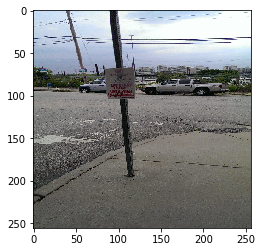

In [30]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
        train_directory,  
        batch_size=1,
        class_mode='categorical')


x, y = train_generator.next()
plt.imshow((x[0]*255).astype('uint8'));
print(list(train_generator.class_indices.keys())[np.argmax(y)])



X_data, Y_data = [], []
for _ in tqdm(range(2750)):
    x, y = train_generator.next()
    X_data.append(x[0])
    Y_data.append(y[0])
X_data = np.asarray(X_data)
Y_data = np.asarray(Y_data)

In [31]:
import numpy as np 
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline


def get_model():
    input_img = Input((256, 256, 3))
    X = BatchNormalization()(input_img)
    X = Convolution2D(16, (3, 3), activation='relu')(X)
    X = BatchNormalization()(X)
    X = Convolution2D(16, (3, 3), activation='relu')(X)
    X = MaxPooling2D()(X)
    X = Convolution2D(32, (3, 3), activation='relu')(X)
    X = BatchNormalization()(X)
    X = Convolution2D(32, (3, 3), activation='relu')(X)
    X = GlobalMaxPooling2D()(X)
#     X = Flatten()(X)
    X = BatchNormalization()(X)
    X = Dense(512, activation='relu')(X)
    X = Dropout(0.2)(X)
    X = Dense(10, activation='softmax')(X)
    model = Model(inputs=input_img, outputs=X)

    model.compile(optimizer='adam', loss='categorical_crossentropy', 
                  metrics=['acc'])
    model.summary()
    return model


model = get_model()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 256, 256, 3)       12        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
batch_normalization_18 (Batc (None, 254, 254, 16)      64        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 252, 252, 16)      2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 124, 124, 32)      4640      
__________

In [32]:
model_history = model.fit(X_data, Y_data, batch_size=10, epochs=3, validation_split=0.2,
                          callbacks=[EarlyStopping(monitor='val_acc', patience=3, verbose=1)])

Train on 2200 samples, validate on 550 samples
Epoch 1/3
2200/2200 [==============================] - 291s 132ms/step - loss: 2.1408 - acc: 0.2214 - val_loss: 2.1730 - val_acc: 0.2182
Epoch 2/3
2200/2200 [==============================] - 284s 129ms/step - loss: 1.8126 - acc: 0.3500 - val_loss: 1.8837 - val_acc: 0.3709
Epoch 3/3
2200/2200 [==============================] - 293s 133ms/step - loss: 1.5973 - acc: 0.4318 - val_loss: 1.6530 - val_acc: 0.4145


In [43]:
# load test images

X_test = []

sample_file_path = os.getcwd() + '/all/' + 'sample_submission.csv'

sub = pd.read_csv(sample_file_path)

for fname in tqdm(sub['fname']):
    filepath = test_directory + '/' + fname
    X_test.append(img_to_array(load_img(filepath, target_size=(256, 256))))
X_test = np.asarray(X_test)

100%|██████████| 2640/2640 [00:40<00:00, 65.99it/s]


# Predictions

In [47]:
# preds = model.predict(X_test, verbose=1)
# preds = np.argmax(preds, axis=1)
# preds = [list(train_generator.class_indices.keys())[p] for p in tqdm(preds)]

    
# print preds

HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
HTC-1-M7
H